In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('C:/Users/OM/Downloads/travel_data(ARIMA).csv')
data

Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0    06-01-2012     16:37     Friday    Home     51.29     127.4      78.3   
1    06-01-2012     08:20     Friday     GSK     51.63     130.3      81.8   
2    04-01-2012     16:17  Wednesday    Home     51.27     127.4      82.0   
3    04-01-2012     07:53  Wednesday     GSK     49.17     132.3      74.2   
4    03-01-2012     18:57    Tuesday    Home     51.15     136.2      83.4   
..          ...       ...        ...     ...       ...       ...       ...   
200  18-07-2011     08:09     Monday     GSK     54.52     125.6      49.9   
201  14-07-2011     08:03   Thursday     GSK     50.90     123.7      76.2   
202  13-07-2011     17:08  Wednesday    Home     51.96     132.6      57.5   
203  12-07-2011     17:51    Tuesday    Home     53.28     125.8      61.6   
204  11-07-2011     16:56     Monday    Home     51.73     125.0      62.8   

     AvgMovingSpeed FuelEconomy  TotalTime  MovingTime Take407All Comments  
0              84.8         NaN       39.3        36.3         No      NaN  
1              88.9         NaN       37.9        34.9         No      NaN  
2              85.8         NaN       37.5        35.9         No      NaN  
3              82.9         NaN       39.8        35.6         No      NaN  
4              88.1         NaN       36.8        34.8         No      NaN  
..              ...         ...        ...         ...        ...      ...  
200            82.4        7.89       65.5        39.7         No      NaN  
201            95.1        7.89       40.1        32.1        Yes      NaN  
202            76.7         NaN       54.2        40.6        Yes      NaN  
203            87.6         NaN       51.9        36.5        Yes      NaN  
204            92.5         NaN       49.5        33.6        Yes      NaN  

[205 rows x 13 columns]

In [3]:
data.info()
print(data.columns)
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(6), object(7)
memory usage: 20.9+ KB
Index(['Date', 'StartTime', 'DayOfWeek', 'GoingTo', 'Distance', 'MaxSpeed',
       'AvgSpeed', 'AvgMovingSpeed', 'FuelEconomy', 'TotalTime', 'MovingTime',
       'Take

In [4]:
data.isnull().sum()

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [6]:
df1 = data[['Date','Distance']]
df1

Date  Distance
0    06-01-2012     51.29
1    06-01-2012     51.63
2    04-01-2012     51.27
3    04-01-2012     49.17
4    03-01-2012     51.15
..          ...       ...
200  18-07-2011     54.52
201  14-07-2011     50.90
202  13-07-2011     51.96
203  12-07-2011     53.28
204  11-07-2011     51.73

[205 rows x 2 columns]

In [8]:
df1['SMA'] =df1['Distance'].mean()

C:\Users\OM\AppData\Local\Temp\ipykernel_11156\1412126502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SMA'] =df1['Distance'].mean()


In [9]:
df1.dropna(inplace= True)

C:\Users\OM\AppData\Local\Temp\ipykernel_11156\2643716341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace= True)


<Axes: >

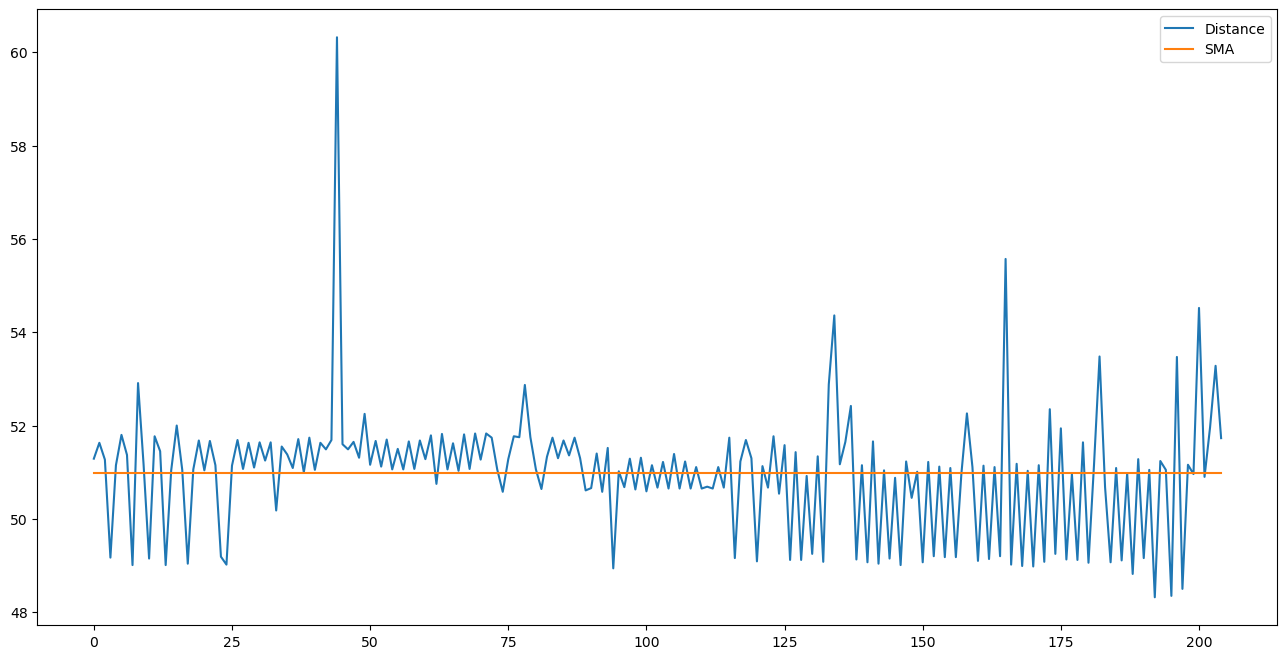

In [10]:
df1[['Distance','SMA']].plot(figsize=(16,8))

<Axes: >

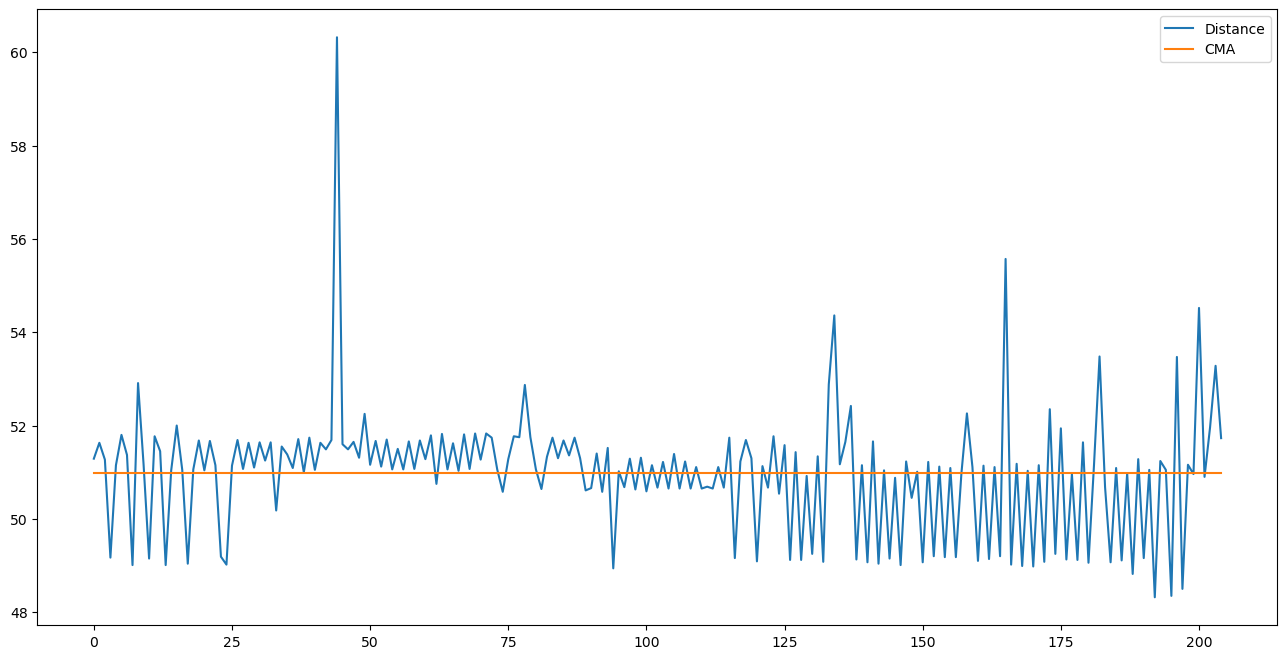

In [11]:
df2 = data['Distance'].to_frame()
df2['CMA'] = df2['Distance'].mean()
df2[['Distance','CMA']].plot(figsize=(16,8))

<Axes: >

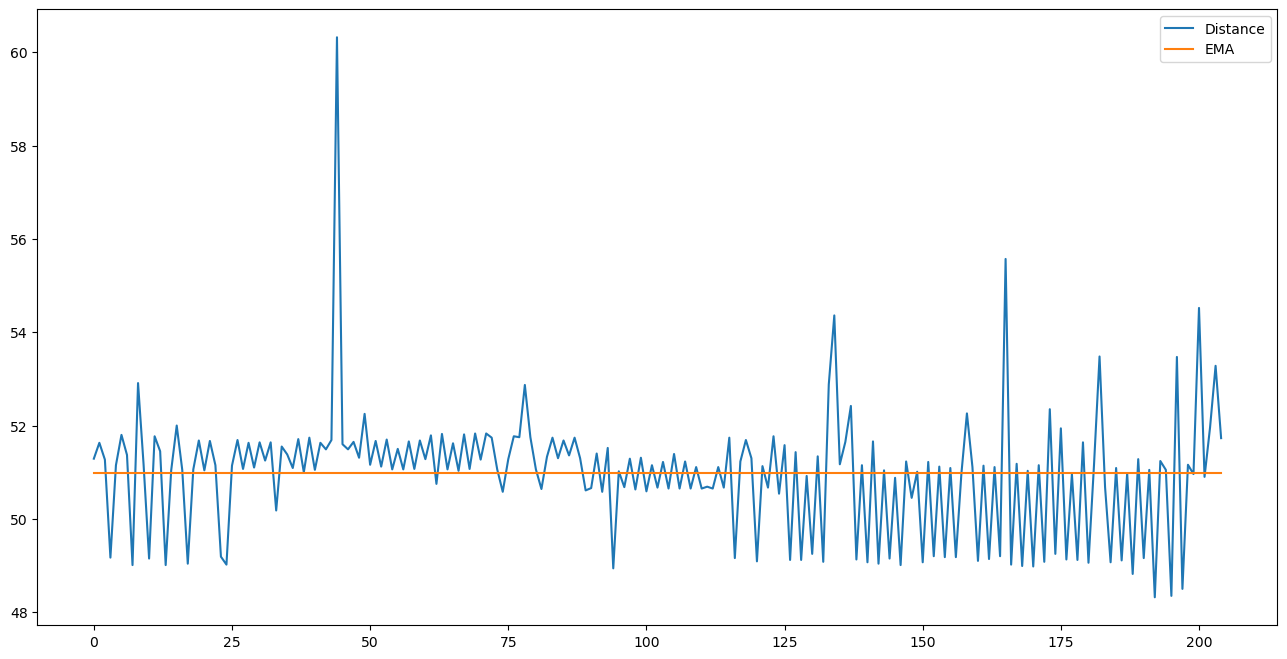

In [12]:
df2 = data['Distance'].to_frame()
df2['EMA'] = df2['Distance'].mean()
df2[['Distance','EMA']].plot(figsize=(16,8))

In [12]:
#Date, Distance 

In [13]:
df1 = data['Distance'].to_frame()
df1

Distance
0       51.29
1       51.63
2       51.27
3       49.17
4       51.15
..        ...
200     54.52
201     50.90
202     51.96
203     53.28
204     51.73

[205 rows x 1 columns]

In [14]:
df1.head

<bound method NDFrame.head of      Distance
0       51.29
1       51.63
2       51.27
3       49.17
4       51.15
..        ...
200     54.52
201     50.90
202     51.96
203     53.28
204     51.73

[205 rows x 1 columns]>

In [15]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller


In [16]:
result = adfuller(df1['Distance'])
print('ADF statistic-',result[0])
print('p-value-',result[1])
#data is not stationary

ADF statistic- -4.787403667320344
p-value- 5.748518567469749e-05


In [17]:
df1.plot()

<Axes: >

In [18]:
df1['diff1'] = df1['Distance']-df1['Distance'].shift( periods = 7)
df1

Distance  diff1
0       51.29    NaN
1       51.63    NaN
2       51.27    NaN
3       49.17    NaN
4       51.15    NaN
..        ...    ...
200     54.52   3.28
201     50.90  -0.15
202     51.96   3.61
203     53.28  -0.19
204     51.73   3.23

[205 rows x 2 columns]

In [19]:
df1.dropna( inplace = True)
result = adfuller(df1['diff1'])
print('ADF statistic-',result[0])
print('p-value -',result[1])


###now p_value is less the 0.05 and choose 'd - value as 7'

ADF statistic- -7.746027923490447
p-value - 1.0314603430768294e-11


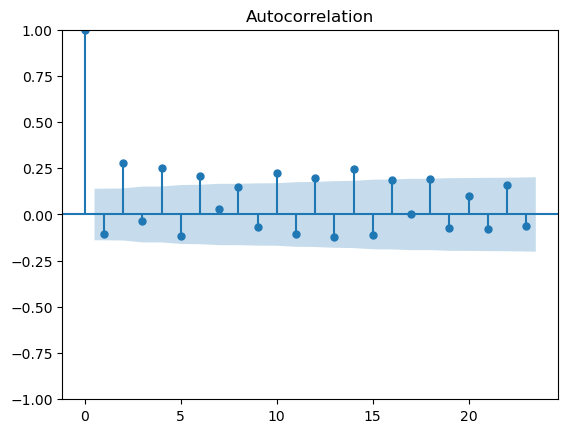

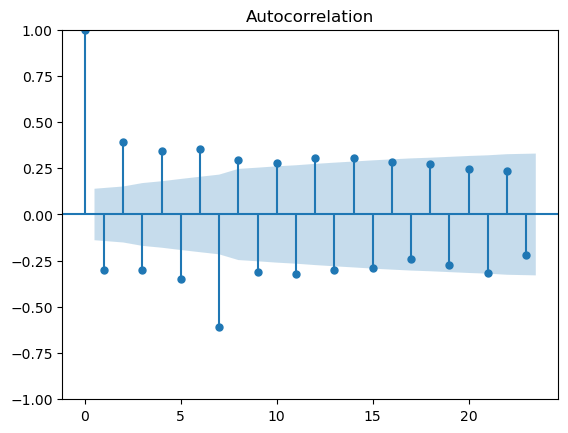

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1['Distance'])
plot_acf(df1['diff1'])

In [21]:
!pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


C:\Users\OM\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


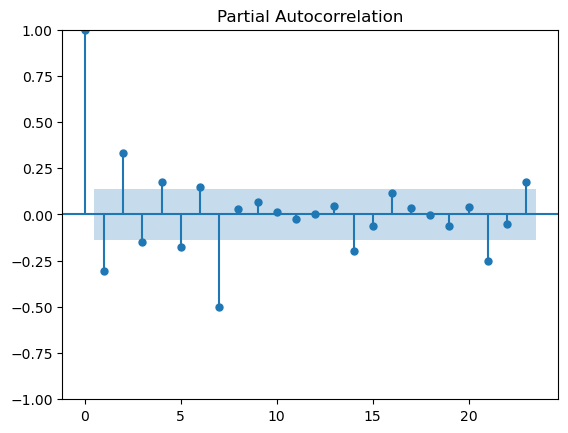

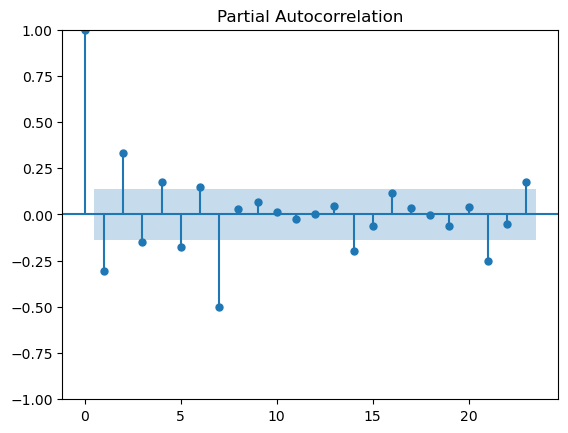

In [22]:
plot_pacf(df1['Distance'])
plot_pacf(df1['diff1'])

C:\Users\OM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\OM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\OM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

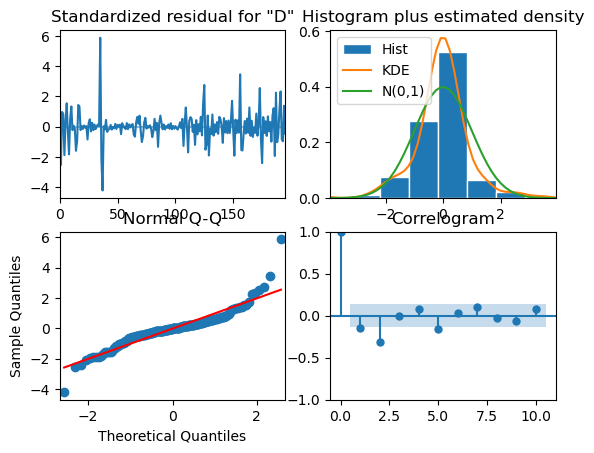

In [36]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df1['Distance'],order= (1,2,1))
model_fit = model.fit()
model_fit.summary()
model_fit.plot_diagnostics()
pred = model_fit.predict(df1['Distance'])


InvalidIndexError: (slice(None, None, None), 0)

In [37]:
pred = model.fit.predict(df1['Distance'])

AttributeError: 'function' object has no attribute 'predict'

In [ ]:
pred = model.fit.predict(start ='2012-02-01', end = '2012-02-28')

In [ ]:
data.columns

In [ ]:
df2= data[['Distance','AvgSpeed']]

In [ ]:
df2['SMA'] =df1['AvgSpeed'].mean()

In [ ]:
df2.dropna(inplace= True)

In [ ]:
df1[['AvgSpeed','SMA']].plot(figsize=(16,8))

In [ ]:
df2 = data['AvgSpeed'].to_frame()
df2['CMA'] = df2['AvgSpeed'].mean()
df2[['AvgSpeed','CMA']].plot(figsize=(16,8))

In [ ]:
df3 = data['Distance'].to_frame()
df3

In [46]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Load the time series data
data = pd.read_csv('C:/Users/OM/Downloads/travel_data(ARIMA).csv')

# Prepare the data
dates = pd.to_datetime(data['Date'])
Distance = data['Distance']

# Create the ARIMA model
model = ARIMA(Distance, order=(1,2,1))

# Fit the ARIMA model
model_fit = model.fit()

# Generate predictions
predictions = model_fit.predict(start='11-07-2011',end= '06-01-2012')

# Print the predictions
print(predictions)







C:\Users\OM\AppData\Local\Temp\ipykernel_11156\1459587660.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.to_datetime(data['Date'])


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'